#✏️ Introdução: Por Que o Poder é Importante?

Imagine que você está avaliando um novo tratamento para dor crônica. Se o estudo for mal planejado: Mesmo que o tratamento funcione, você pode não encontrar diferença estatisticamente significativa.

Resultado: você concluiria erradamente que o tratamento não é eficaz.

👉 O poder estatístico nos protege desse tipo de erro.

#🔍 Definição Formal

> Poder estatístico é a probabilidade de rejeitar corretamente a hipótese nula (H₀) quando ela é falsa.

Matematicamente:

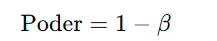

Onde: 𝛽 é a probabilidade de cometer um erro tipo II (não detectar um efeito que existe).

* Quando β é grande → Alto risco de não encontrar um efeito real.
* Quando poder é alto (ex: 80%, 90%) → Maior chance de detectar um efeito verdadeiro.

Imagine que você está avaliando um novo método de ensino. Se o novo método for realmente melhor, o estudo precisa ter alta chance de detectar essa superioridade — esse é o poder. Se o estudo for mal desenhado (pequena amostra, grande variabilidade, etc.), o método pode ser bom, mas você não conseguirá provar isso — ou seja, terá baixo poder.

#🎨 Ilustração Gráfica

Vamos visualizar:
* A curva preta representa a distribuição sob H0.
* A curva azul representa a distribuição sob H1.
* A linha vertical é o limite crítico baseado no nível de significância (𝛼).

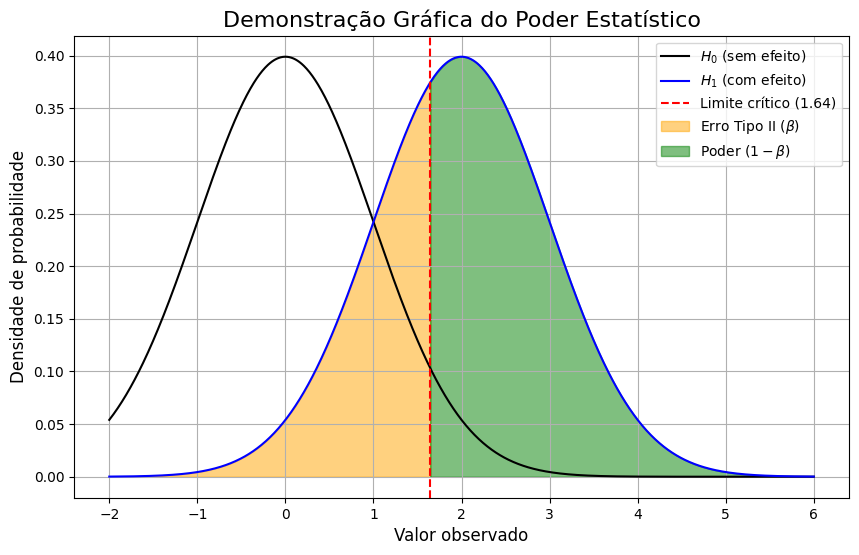

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros
mu0 = 0       # Média sob H0
mu1 = 2       # Média sob H1 (efeito real)
sigma = 1     # Desvio padrão
alpha = 0.05  # Nível de significância (unilateral)

# Valor crítico para rejeitar H0
z_alpha = norm.ppf(1 - alpha)
limite_critico = mu0 + z_alpha * sigma

# Eixo x para plotar
x = np.linspace(-2, 6, 1000)

# Densidades
y_h0 = norm.pdf(x, mu0, sigma)
y_h1 = norm.pdf(x, mu1, sigma)

# Gráfico
plt.figure(figsize=(10,6))
plt.plot(x, y_h0, label=r'$H_0$ (sem efeito)', color='black')
plt.plot(x, y_h1, label=r'$H_1$ (com efeito)', color='blue')
plt.axvline(limite_critico, color='red', linestyle='--', label=f'Limite crítico ({limite_critico:.2f})')

# Sombreamento: Erro Tipo II (β)
x_beta = np.linspace(-2, limite_critico, 1000)
plt.fill_between(x_beta, 0, norm.pdf(x_beta, mu1, sigma), color='orange', alpha=0.5, label=r'Erro Tipo II ($\beta$)')

# Sombreamento: Poder (1-β)
x_power = np.linspace(limite_critico, 6, 1000)
plt.fill_between(x_power, 0, norm.pdf(x_power, mu1, sigma), color='green', alpha=0.5, label=r'Poder ($1-\beta$)')

plt.title('Demonstração Gráfica do Poder Estatístico', fontsize=16)
plt.xlabel('Valor observado', fontsize=12)
plt.ylabel('Densidade de probabilidade', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



Como interpretar:

* 🔵 Curva preta: Distribuição se a hipótese nula (H0) for verdadeira (sem efeito).
* 🔵 Curva azul: Distribuição se a hipótese alternativa (H1) for verdadeira (há efeito real).
* 🔴 Linha vermelha pontilhada: Limite crítico baseado em 𝛼 = 0,05
* 🟧 Área laranja: Erro Tipo II (𝛽) → falhar em detectar um efeito verdadeiro.
* 🟩 Área verde: Poder estatístico (1 − 𝛽) → capacidade de detectar um efeito verdadeiro.

#🎯 Simulação do poder estatístico

Esta simulação ilustra o efeito do
* tamanho da amostra,
* a diferença entre a média populacional e a média hipotética,
* o desvio padrão,
* o tipo de teste (unicaudal ou bicaudal) e
* o nível de significância no poder de um teste t de duas amostras.

In [1]:
from scipy.stats import norm
import numpy as np
import pandas as pd

Examine as curvas de potência. O eixo X mostra o tamanho da amostra, o eixo Y mostra o poder. Observe o efeito do tamanho da amostra e do nível de significância no poder.

### **O impacto sobre o poder estatístico da escolha do nível de significância (alfa) e do tamanho da amostra**

In [2]:
N = 100
true_diff = 0.15 # diferença real entre a média da população e a média hipotética.
true_std = 0.3 #desvio padrão da população.
alphas = [0.1, 0.05, 0.01] #significância considerada (10%, 5% e 1%).

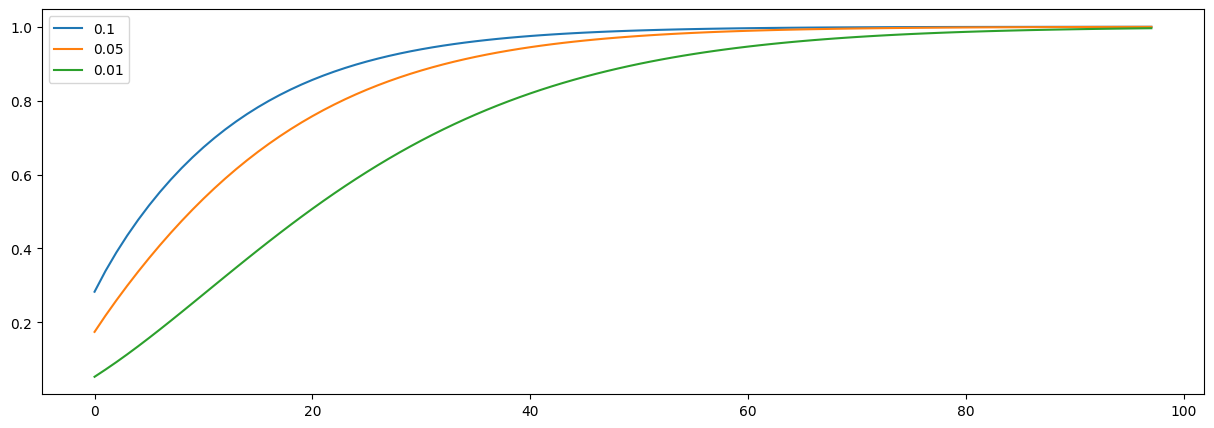

In [3]:
for alpha in alphas:
    powers = []
    for n in range(2, N):
        tmp = norm(0, true_std / n ** 0.5).ppf(1 - alpha)
        powers.append(norm(true_diff, true_std / n ** 0.5).sf(tmp))
    _ = pd.Series(powers, name=alpha).plot(figsize=(15, 5), legend=True)

* Linha azul (α = 0.1): Significância mais alta (10%) → maior poder para o mesmo tamanho de amostra.
* Linha laranja (α = 0.05): Significância padrão (5%) → poder intermediário.
* Linha verde (α = 0.01): Significância mais rigorosa (1%) → menor poder para o mesmo tamanho de amostra.

Explicação: Quando exigimos um p-valor mais pequeno (ex.: 0.01 em vez de 0.05), fica mais difícil rejeitar H₀, então o poder cai para o mesmo n. Para manter o mesmo poder, teríamos que aumentar o tamanho da amostra se reduzirmos α.

Além disso, você vê que o poder vai se achatando no topo do gráfico? Isso mostra que depois de certo ponto, aumentar ainda mais o tamanho da amostra tem benefício marginal

###**O impacto sobre o poder estatístico do tamanho do efeito**

In [6]:
N = 100
true_diff = 0.30 # diferença real entre a média da população e a média hipotética.
true_std = 0.3 #desvio padrão da população.
alphas = [0.1, 0.05, 0.01] #significância considerada (10%, 5% e 1%).

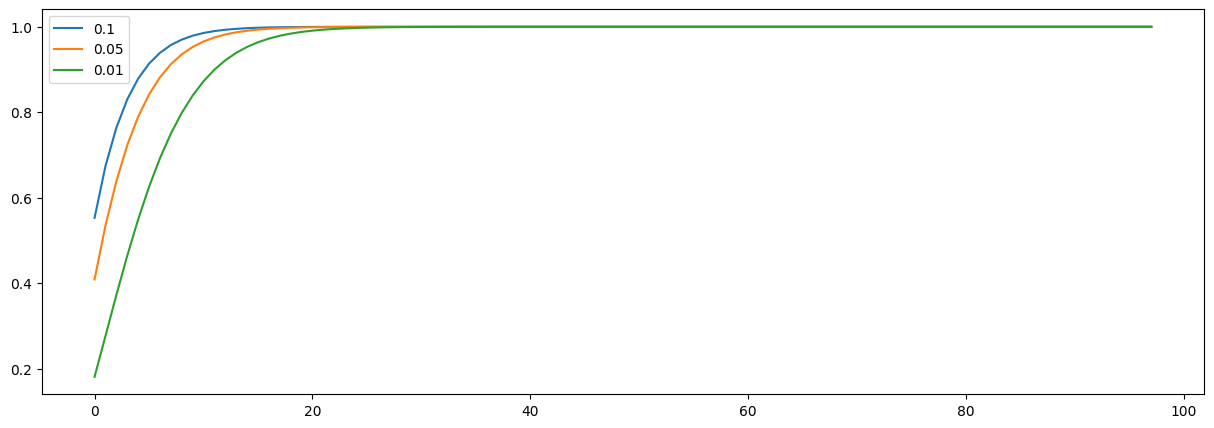

In [7]:
for alpha in alphas:
    powers = []
    for n in range(2, N):
        tmp = norm(0, true_std / n ** 0.5).ppf(1 - alpha)
        powers.append(norm(true_diff, true_std / n ** 0.5).sf(tmp))
    _ = pd.Series(powers, name=alpha).plot(figsize=(15, 5), legend=True)

True_diff representa o tamanho do efeito — ou seja, o quão diferente a média populacional é da média hipotética. Aumentar true_diff significa que o efeito real ficou maior.

O poder aumentou mais rapidamente. Agora, mesmo com tamanhos de amostra pequenos, o poder já é alto. As curvas sobem muito mais rápido e se achatam no topo mais cedo (com amostras menores).

Quando a diferença entre a média real e a média hipotética é maior, os testes têm mais facilidade para encontrar uma diferença estatisticamente significativa. Ou seja, o sinal (diferença real) fica mais forte em relação ao ruído (variação dos dados).

Em outras palavras:

* Se o efeito é pequeno → precisamos de amostras grandes para "enxergar".
* Se o efeito é grande → mesmo amostras pequenas já conseguem "captar".

###**O impacto sobre o poder estatístico do desvio padrão da população**

In [8]:
N = 100
true_diff = 0.15 # diferença real entre a média da população e a média hipotética.
true_std = 0.6 #desvio padrão da população.
alphas = [0.1, 0.05, 0.01] #significância considerada (10%, 5% e 1%).

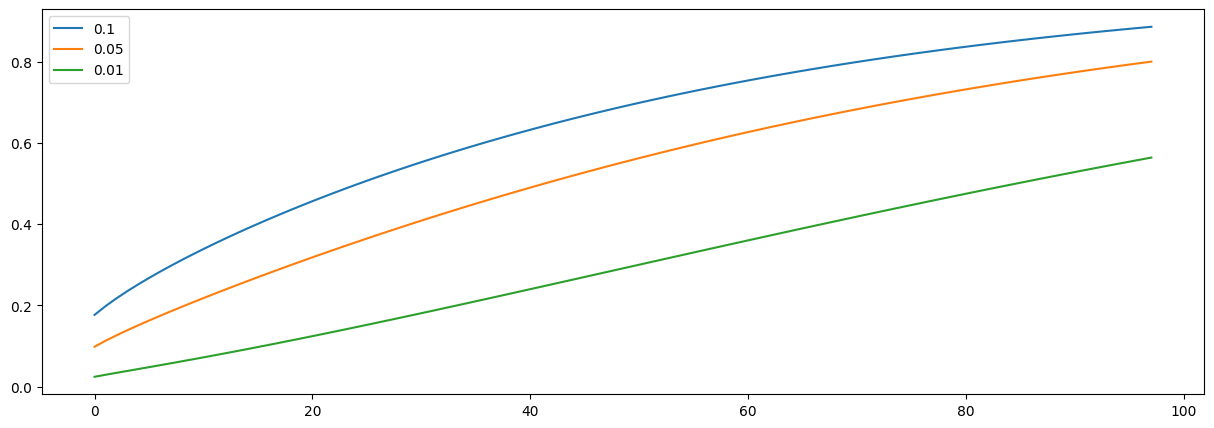

In [9]:
for alpha in alphas:
    powers = []
    for n in range(2, N):
        tmp = norm(0, true_std / n ** 0.5).ppf(1 - alpha)
        powers.append(norm(true_diff, true_std / n ** 0.5).sf(tmp))
    _ = pd.Series(powers, name=alpha).plot(figsize=(15, 5), legend=True)

As curvas ficaram muito mais achatadas. O poder estatístico diminuiu consideravelmente para todos os tamanhos de amostra. Leva muito mais amostras para alcançar o mesmo poder que antes. Lembre-se que o desvio padrão é uma medida de dispersão. Se o desvio padrão da população aumenta, os dados ficam mais espalhados. Mais espalhamento = mais "barulho" = mais difícil perceber a diferença verdadeira. Então, mesmo que exista uma diferença real entre as médias (true_diff = 0,15), o "ruído" dificulta detectá-la. É como tentar ouvir uma música (efeito verdadeiro) em um ambiente muito barulhento (desvio padrão alto): Quanto maior o barulho, mais difícil perceber a música.

###**O impacto sobre o poder estatístico do tipo de teste: unicaldal ou bicaldal**

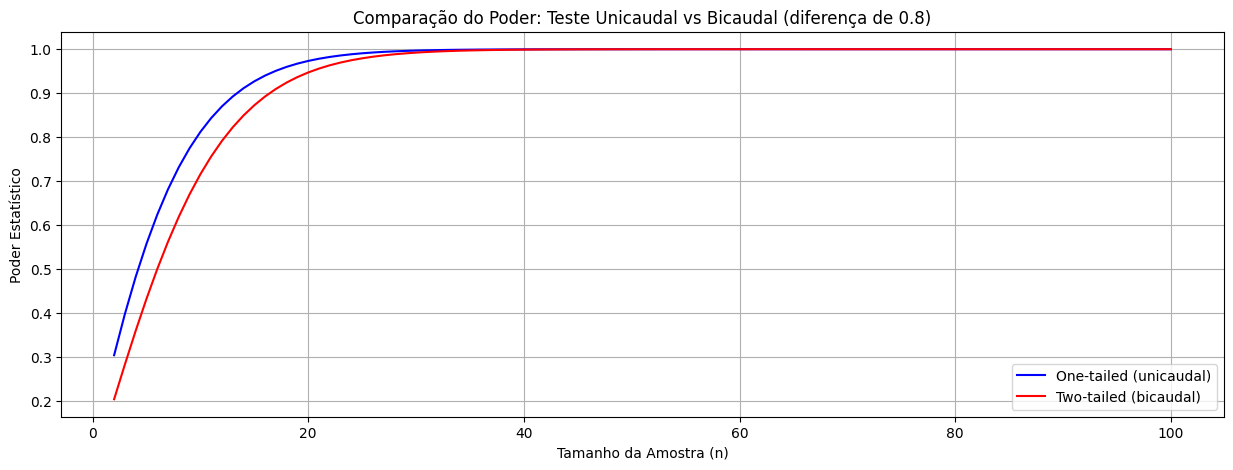

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros
N = 100
true_diff = 0.8  # agora um efeito mais difícil de detectar
true_std = 1
alpha = 0.05

# Simular
sample_sizes = np.arange(2, 101)
powers_one_tail = []
powers_two_tail = []

for n in sample_sizes:
    se = true_std / np.sqrt(n)
    z_alpha_one = norm.ppf(1 - alpha)
    power_one = norm.sf(z_alpha_one - true_diff / se)
    powers_one_tail.append(power_one)

    z_alpha_two = norm.ppf(1 - alpha/2)
    power_two = norm.sf(z_alpha_two - true_diff / se)
    powers_two_tail.append(power_two)

# Plotar
plt.figure(figsize=(15,5))
plt.plot(sample_sizes, powers_one_tail, label='One-tailed (unicaudal)', color='blue')
plt.plot(sample_sizes, powers_two_tail, label='Two-tailed (bicaudal)', color='red')
plt.xlabel('Tamanho da Amostra (n)')
plt.ylabel('Poder Estatístico')
plt.title('Comparação do Poder: Teste Unicaudal vs Bicaudal (diferença de 0.8)')
plt.legend()
plt.grid(True)
plt.show()


🔵 O teste unicaudal tem mais poder porque toda a área do erro tipo I (alfa) é concentrada em apenas uma cauda.

🔴 O teste bicaudal divide o alfa em duas caudas (alpha/2 para cada lado), então fica mais difícil atingir a região crítica.

###**Conclusão sobre os fatores**

O poder estatístico representa a capacidade de um teste detectar uma diferença real quando ela de fato existe. A análise dos fatores que influenciam o poder nos ajuda a entender como planejar experimentos mais robustos e confiáveis. Com base nas variações analisadas, podemos resumir da seguinte forma:

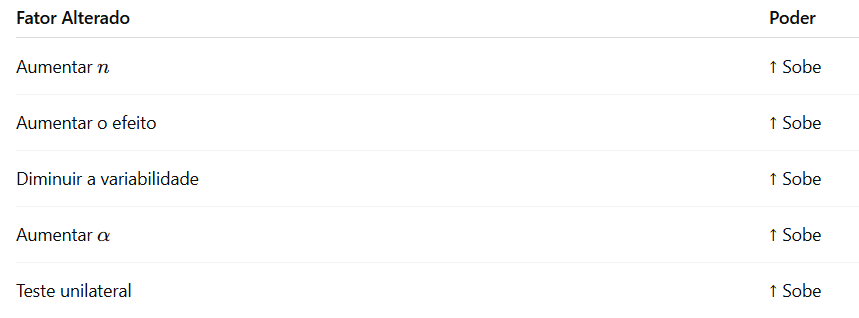

#🤔 Efeito da categorização sobre o poder estatísticoo

### **Gerando amostras**

In [13]:
# Configuração para simulação
np.random.seed(42)
n = 100  # número de amostras em cada grupo
grupo_a_mu, grupo_a_sigma = 3000, 500  # média e desvio padrão para o grupo A
grupo_b_mu, grupo_b_sigma = 2600, 500  # média e desvio padrão para o grupo B

In [14]:
# Geração de dados: pesos ao nascer para dois grupos diferentes
pesos_grupo_a = np.random.normal(grupo_a_mu, grupo_a_sigma, n)
pesos_grupo_b = np.random.normal(grupo_b_mu, grupo_b_sigma, n)

In [15]:
pesos_grupo_a

array([3248.35707651, 2930.86784941, 3323.84426905, 3761.5149282 ,
       2882.92331264, 2882.93152153, 3789.60640775, 3383.71736458,
       2765.26280703, 3271.28002179, 2768.29115359, 2767.13512321,
       3120.98113578, 2043.35987767, 2137.54108374, 2718.85623538,
       2493.58443983, 3157.1236663 , 2545.98796224, 2293.84814933,
       3732.82438446, 2887.11184976, 3033.76410234, 2287.62590689,
       2727.80863774, 3055.46129485, 2424.50321129, 3187.84900917,
       2699.68065504, 2854.1531251 , 2699.14669389, 3926.13909225,
       2993.25138763, 2471.14453552, 3411.27245605, 2389.57817501,
       3104.4317975 , 2020.16493806, 2335.90697555, 3098.43061793,
       3369.23329   , 3085.68414059, 2942.17585881, 2849.44815221,
       2260.73900482, 2640.0778958 , 2769.68061452, 3528.56111311,
       3171.80914478, 2118.47992232, 3162.0419847 , 2807.45885979,
       2661.53899985, 3305.83814442, 3515.49976125, 3465.64005956,
       2580.39123839, 2845.39381207, 3165.6317157 , 3487.77256

In [16]:
pesos_grupo_b

array([1892.31462897, 2389.67733862, 2428.64274174, 2198.86136539,
       2519.35714417, 2802.02542841, 3543.09295061, 2687.28890642,
       2728.77519536, 2562.77704212, 1640.61439235, 2586.74306228,
       2630.11510497, 3831.62105624, 2503.81951761, 2750.77367117,
       2582.64411515, 2015.66098119, 3171.41140726, 2975.96651634,
       2995.51597352, 2145.3062726 , 3301.39715547, 1899.0744686 ,
       2893.4285469 , 3695.2278129 , 2104.73183743, 2316.8511352 ,
       2649.82568254, 2348.26217294, 1824.66828447, 2634.2814874 ,
       2068.84814314, 2836.79621532, 2140.28788288, 3374.96720251,
       2208.37335383, 2438.9692419 , 3006.75860868, 1984.56784178,
       2713.7299673 , 3253.57137714, 1796.25838272, 2692.31692927,
       2729.94139712, 2990.91143589, 1981.52464456, 1939.77169346,
       2860.97078281, 2748.49233662, 2725.24642517, 2773.22410475,
       2259.98763921, 2716.12684858, 2746.53623665, 2242.82429099,
       3532.88725557, 2836.91646046, 2004.3482514 , 2928.27680

### **Dicotomizando**

In [17]:
# Dicotomização dos dados em 'baixo peso' e 'não baixo peso'
dicotomizado_a = (pesos_grupo_a <= 2500).astype(int)
dicotomizado_b = (pesos_grupo_b <= 2500).astype(int)

In [18]:
dicotomizado_a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [19]:
dicotomizado_b

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

<ipython-input-21-7e5d132da91c>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Não Baixo Peso (>2500g)', 'Baixo Peso (≤2500g)'])


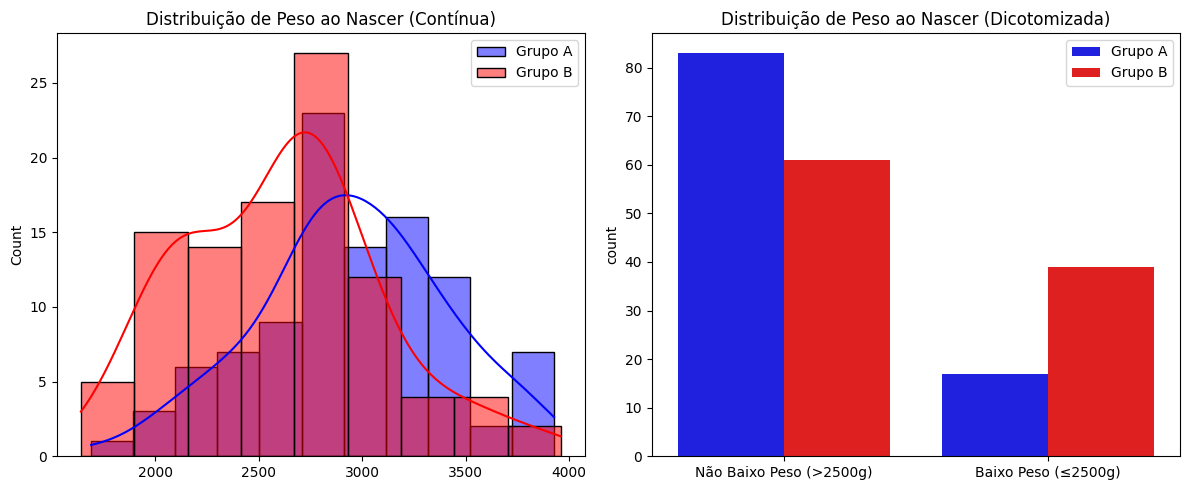

In [21]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot para dados contínuos
sns.histplot(pesos_grupo_a, color="blue", kde=True, label="Grupo A", ax=ax[0])
sns.histplot(pesos_grupo_b, color="red", kde=True, label="Grupo B", ax=ax[0])
ax[0].set_title("Distribuição de Peso ao Nascer (Contínua)")
ax[0].legend()

# Plot para dados dicotomizados
sns.countplot(x=np.concatenate([dicotomizado_a, dicotomizado_b]),
              hue=np.array(["Grupo A"]*n + ["Grupo B"]*n),
              palette=["blue", "red"], ax=ax[1])
ax[1].set_title("Distribuição de Peso ao Nascer (Dicotomizada)")
ax[1].set_xticklabels(['Não Baixo Peso (>2500g)', 'Baixo Peso (≤2500g)'])
ax[1].legend()

plt.tight_layout()
plt.show()

* À esquerda: O gráfico de distribuição de peso ao nascer mostra as curvas de densidade para o Grupo A e o Grupo B com a variável contínua. A sobreposição é menor e as distribuições são mais distintas, facilitando a detecção de diferenças significativas.

* À direita: O gráfico de barras para a variável dicotomizada mostra a frequência de baixo peso versus não baixo peso nos dois grupos. A simplicidade da dicotomização resulta em perda de nuances entre os dados, o que pode obscurecer diferenças menores, reduzindo assim o poder estatístico do teste.

Esses gráficos são visuais eficazes para demonstrar como a dicotomização pode simplificar excessivamente os dados, levando a uma diminuição do poder estatístico para detectar diferenças significativas entre grupos.

### **Teste de hipótese para Dados Contínuos**

Será que a população B tem crianças nascendo com mais baixo peso que a população A? Será isso uma evidência de problemas no pré-natal?

* Hipótese Nula (H0): A média do peso ao nascer do Grupo B é igual ou maior que a do Grupo A. Ou seja, 𝜇𝐵 ≥ 𝜇𝐴.

* Hipótese Alternativa (H1): A média do peso ao nascer do Grupo B é menor que a do Grupo A. Ou seja, 𝜇𝐵 < 𝜇𝐴 μB ​< μA​.

Este teste unicaudal à esquerda é usado quando a preocupação é apenas se uma média é menor que a outra, não simplesmente diferente.

In [23]:
from scipy.stats import ttest_ind

In [24]:
t_stat_cont_uni_left, p_value_cont_uni_left = ttest_ind(pesos_grupo_b, pesos_grupo_a, alternative='less')
t_stat_cont_uni_left, p_value_cont_uni_left

(np.float64(-5.116890455827676), np.float64(3.660023713569912e-07))

In [25]:
p_value_cont_uni_left <= 0.05

np.True_

Este resultado sugere que, se a hipótese nula (que a média do peso ao nascer do Grupo B é igual ou maior que a do Grupo A) fosse verdadeira, a probabilidade de obter uma diferença de médias tão grande ou maior (em direção a favor do Grupo A sendo maior) seria de 5% ou menos.

In [26]:
# Tamanho do efeito para o teste unicaudal à esquerda (dados contínuos)
effect_size_cont_uni_left = (grupo_b_mu - grupo_a_mu) / np.sqrt(((grupo_a_sigma**2 + grupo_b_sigma**2) / 2))
effect_size_cont_uni_left

np.float64(-0.8)

O tamanho do efeito é uma medida quantitativa da magnitude da diferença entre dois grupos, independentemente do tamanho da amostra. Ele fornece uma indicação de quão grande é o efeito em termos práticos. Este valor indica um tamanho de efeito grande, segundo convenções geralmente aceitas (Cohen sugeriu que 0.2 é um efeito pequeno, 0.5 é um efeito médio e 0.8 é um efeito grande). O sinal negativo (-0.8) indica a direção do efeito, sugerindo que a média do Grupo B é substancialmente menor que a do Grupo A, o que está alinhado com a hipótese alternativa que postula que o Grupo B tem uma média de peso ao nascer menor que o Grupo A.

In [28]:
from statsmodels.stats.power import TTestIndPower

In [29]:
# Instanciando o objeto para cálculo de poder
power_analysis = TTestIndPower()

In [30]:
# Calculando o poder para o teste unicaudal à esquerda (dados contínuos)
power_cont_uni_left = power_analysis.solve_power(effect_size=effect_size_cont_uni_left, nobs1=n, alpha=0.05, ratio=1, alternative='smaller')
power_cont_uni_left

np.float64(0.999999992291371)

### **Teste de hipótese para Dados Dicotomizados**

Será que a população B tem maior proporção de crianças nascendo com baixo peso que a população A? Será isso uma evidência de problemas no pré-natal?

* Hipótese Nula (H0): A proporção de baixo peso ao nascer no Grupo B é igual ou menor que no Grupo A. Ou seja, 𝑝 𝐵 ≤ 𝑝 𝐴.

* Hipótese Alternativa (H1): A proporção de baixo peso ao nascer no Grupo B é maior que no Grupo A. Ou seja, 𝑝 𝐵>𝑝𝐴.

Este teste unicaudal à direita é apropriado quando o interesse é verificar se uma proporção é especificamente maior em um grupo em comparação ao outro.

In [31]:
t_stat_dicot_uni_right, p_value_dicot_uni_right = ttest_ind(dicotomizado_b, dicotomizado_a, alternative='greater')
t_stat_dicot_uni_right, p_value_dicot_uni_right

(np.float64(3.5556636600393654), np.float64(0.0002357973174445257))

In [32]:
p_value_dicot_uni_right <= 0.05

np.True_

Este resultado indica que há evidências suficientes para rejeitar a hipótese nula ao nível de significância de 5%. A hipótese nula, neste caso, afirma que a proporção de baixo peso ao nascer no Grupo B é igual ou menor que no Grupo A. Um p-valor menor ou igual a 0.05 sugere que a proporção de baixo peso no Grupo B é significativamente maior que no Grupo A, conforme a direção especificada pela hipótese alternativa.

In [33]:
#O cálculo do tamanho do efeito para os dados dicotomizados foi feito de maneira diferente por causa da natureza dos dados após a dicotomização.
#Neste caso, os dados não são mais medidas contínuas, mas sim proporções (taxas de baixo peso ao nascer).
#Portanto, o tamanho do efeito é calculado usando uma fórmula que é mais adequada para comparar duas proporções, ao invés de duas médias.

p_a = 0.26
p_b = 0.31
effect_size_dicot_uni_right = (p_b - p_a) / np.sqrt(p_a*(1-p_a) + p_b*(1-p_b) / 2)
effect_size_dicot_uni_right

np.float64(0.09138614826221808)

Este valor é considerado um tamanho do efeito pequeno. Ele indica que a diferença entre as proporções de baixo peso ao nascer entre os grupos A e B é positiva, mas modesta. O tamanho do efeito é uma medida importante porque, ao contrário do p-valor, não é influenciado pelo tamanho da amostra. Portanto, ele fornece uma compreensão mais intuitiva da relevância prática da diferença observada.

In [34]:
# Calculando o poder para o teste unicaudal à direita (dados dicotomizados)
power_dicot_uni_right = power_analysis.solve_power(effect_size=effect_size_dicot_uni_right, nobs1=n, alpha=0.05, ratio=1, alternative='larger')
power_dicot_uni_right

np.float64(0.15844678994957295)

Este é um valor de poder estatístico muito baixo, indicando que o teste tem uma capacidade limitada de detectar uma diferença real entre os grupos, caso ela exista.

### **Conclusão**

Conclusão: Este exemplo ilustra claramente o cenário comum em que a dicotomização de uma variável contínua pode levar à redução do poder estatístico. Isso destaca a importância de considerar cuidadosamente como e quando dicotomizar variáveis em análises estatísticas, especialmente em contextos onde a precisão e a sensibilidade da análise são críticas, como em pesquisas médicas e estudos de saúde.